In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


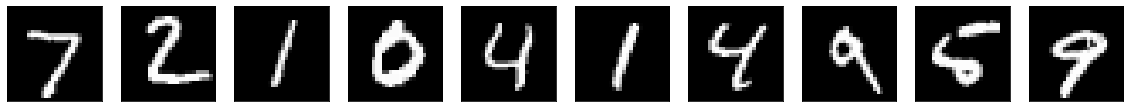

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

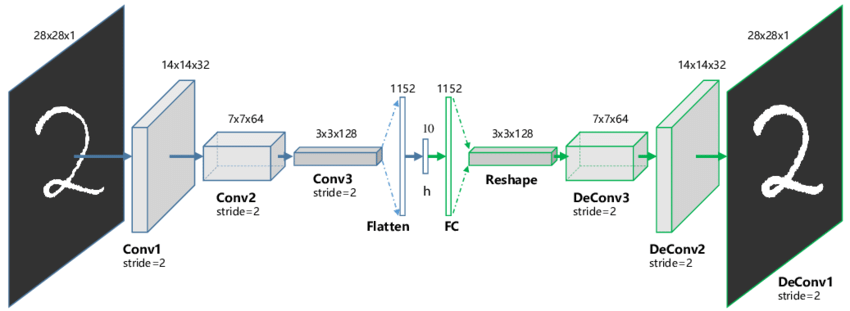

In [49]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D,Reshape

In [50]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3),
                 input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## THIRD SET OF LAYERS
# CONVOLUTIONAL LAYER
#encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
#encode_model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8,activation="relu"))
encode_model.add(Dense(30,activation="relu"))

In [52]:
############
# Decoding #
############
decode_model=Sequential()

# DeConv1
#decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
#decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv2
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv3
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))


In [53]:
autoencoder = Sequential([encode_model, decode_model])
#autoencoder.add(encode_model)
#autoencoder.add(decode_model)

In [54]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [55]:
autoencoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_13 (Sequential)   (None, 30)                167166    
_________________________________________________________________
sequential_15 (Sequential)   (None, 28, 28, 1)         14049     
Total params: 181,215
Trainable params: 181,215
Non-trainable params: 0
_________________________________________________________________


In [56]:
encode_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_4 (Dense)              (None, 30)              

In [40]:
decode_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 7, 7, 392)         12152     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 8)           28232     
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 1)         145       
Total params: 41,697
Trainable params: 41,697
Non-trainable params: 0
_________________________________________________

In [57]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape

(60000, 28, 28, 1)

In [58]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [59]:
# Train the model
autoencoder.fit(x=x_train, y=x_train,
                epochs=10,
                batch_size=128,
                shuffle=True, verbose=1,
                validation_data=(x_test, x_test),
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 751us/sample - loss: 0.0495 - val_loss: 0.0040
Epoch 2/10
60000/60000 [==============================] - 45s 750us/sample - loss: 0.0040 - val_loss: 0.0040
Epoch 3/10
60000/60000 [==============================] - 46s 770us/sample - loss: 0.0040 - val_loss: 0.0040
Epoch 4/10
60000/60000 [==============================] - 47s 788us/sample - loss: 0.0040 - val_loss: 0.0040
Epoch 5/10
60000/60000 [==============================] - 46s 767us/sample - loss: 0.0040 - val_loss: 0.0040
Epoch 6/10
60000/60000 [==============================] - 45s 746us/sample - loss: 0.0040 - val_loss: 0.0040
Epoch 7/10
60000/60000 [==============================] - 45s 758us/sample - loss: 0.0040 - val_loss: 0.0040
Epoch 8/10
60000/60000 [==============================] - 47s 777us/sample - loss: 0.0040 - val_loss: 0.0040
Epoch 9/10
60000/60000 [==============================] - 45s 748us/sample - l

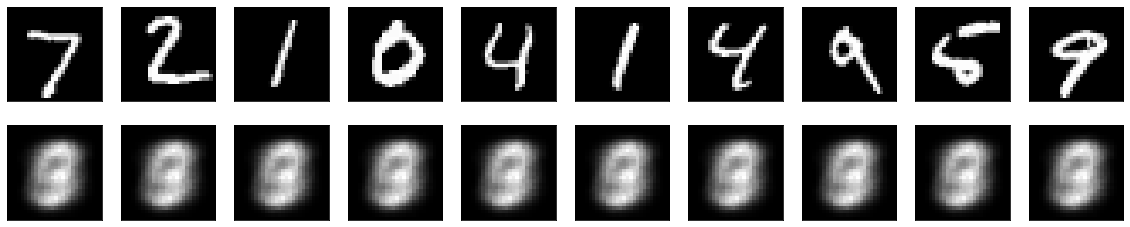

In [60]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()